In [1]:
# Basic settings for pyspark.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4_misl938').getOrCreate()

In [2]:
# Import the relevant Python libraries.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# I have installed pip on python to import seaborn

# sudo apt-get install -y python3-dev python3-setuptools
#sudo apt-get update
#sudo apt-get install python3-pip
#pip3 install -U pip
#pip install seaborn --user

import seaborn as sns

In [4]:
# Let's read in the data.
#housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', inferSchema= True, header = True)
housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', header = True,inferSchema=True)

In [65]:
# The show method allows us to visualise DataFrames.
housing_data.show()


+----------+-------------------+-----+----+-------+------+-------+---------+--------+--------+--------+--------+----+--------+------------+---------+------------------+---------+----------+--------------------+-------------+
|    Suburb|            Address|Rooms|Type|  Price|Method|SellerG|     Date|Distance|Postcode|Bedroom2|Bathroom| Car|Landsize|BuildingArea|YearBuilt|       CouncilArea|Lattitude|Longtitude|          Regionname|Propertycount|
+----------+-------------------+-----+----+-------+------+-------+---------+--------+--------+--------+--------+----+--------+------------+---------+------------------+---------+----------+--------------------+-------------+
|Abbotsford|      68 Studley St|    2|   h|   null|    SS| Jellis|3/09/2016|     2.5|    3067|       2|       1|   1|     126|        null|     null|Yarra City Council| -37.8014|  144.9958|Northern Metropol...|         4019|
|Abbotsford|       85 Turner St|    2|   h|1480000|     S| Biggin|3/12/2016|     2.5|    3067|      

In [52]:
# Let's have a better view of the 20 rows of dataset
housing_data.limit(10).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1,1,126,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1,0,156,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2,1,0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,1,2,120,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067,...,2,2,400,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067,...,1,2,201,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067,...,2,1,202,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019


In [66]:
# Let's have a look at the column names. 
housing_data.columns


['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [67]:
# number of rows/entry in the dataset
housing_data.count()

34857

In [53]:
# We can use the describe method to get some general statistics on our data. 
housing_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Suburb,34857,None,None,Abbotsford,viewbank
Address,34857,None,None,1 Abercrombie St,9b Stewart St
Rooms,34857,3.0310124221820582,0.9699329348975181,1,16
Type,34857,None,None,h,u
Price,27247,1050173.344955408,641467.1301046003,85000,11200000
Method,34857,None,None,PI,W
SellerG,34857,None,None,@Realty,voglwalpole
Date,34857,None,None,1/07/2017,9/12/2017
Distance,34856,11.184929423916575,6.788892455935919,0.0,48.1


In [34]:
# entries with 0 building area
housing_data.filter(housing_data.BuildingArea=='0').count()

76

In [35]:
# number houses was built before 1835
housing_data.filter(housing_data.YearBuilt < '1835' ).count()

4

In [42]:
#houses was built before 1835
housing_data.filter(housing_data.YearBuilt < '1835' ).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Collingwood,2/79 Oxford St,2,u,855000,S,Nelson,3/09/2016,1.6,3066,...,1,1,2886,122,1830,Yarra City Council,-37.8042,144.9845,Northern Metropolitan,4553
1,South Melbourne,403 Park St,3,h,None,SP,Cayzer,20/05/2017,2.1,3205,...,2,0,104,125,1800,Port Phillip City Council,-37.838,144.9525,Southern Metropolitan,5943
2,Mount Waverley,5 Armstrong St,3,h,1200000,VB,McGrath,24/06/2017,14.2,3149,...,1,4,807,117,1196,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366
3,Carlton North,146 Pigdon St,2,u,720000,S,Jellis,28/10/2017,3.5,3054,...,1,None,None,64,1820,Melbourne City Council,-37.78188,144.97227,Northern Metropolitan,3106


In [39]:
# number houses was built after 2018
housing_data.filter(housing_data.YearBuilt > '2018' ).count()

2

In [43]:
# houses was built after 2018
housing_data.filter(housing_data.YearBuilt > '2018' ).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Bulleen,3 Maringa St,4,h,None,SP,Ray,7/11/2016,11.8,3105,...,2,2,729,255,2106,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480
1,Bentleigh,1 Wyuna Ct,3,h,1100000,VB,Woodards,17/03/2018,11.4,3204,...,1,4,635,242,2019,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795


In [8]:
# For type, we can use print schema. 
housing_data.printSchema()


root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: integer (nullable = true)
 |-- Bedroom2: integer (nullable = true)
 |-- Bathroom: integer (nullable = true)
 |-- Car: integer (nullable = true)
 |-- Landsize: integer (nullable = true)
 |-- BuildingArea: double (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: integer (nullable = true)



In [14]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,DateType,ShortType,DoubleType,StructType)

In [15]:
# Then create a variable with the correct structure.

data_schema = [StructField('Suburb',StringType(),True),
               StructField('Address',StringType(),True),
               StructField('Rooms',IntegerType(),True),
               StructField('Type',StringType(),True),
               StructField('Price',IntegerType(),True),
               StructField('Method',StringType(),True),
               StructField('SellerG',StringType(),True),
               StructField('Date',DateType(),True),
               StructField('Distance',DoubleType(),True),
               StructField('Postcode',IntegerType(),True),
               StructField('Bedroom2',IntegerType(),True),            
               StructField('Bathroom',IntegerType(),True),
               StructField('Car',IntegerType(),True),
               StructField('Landsize',IntegerType(),True),
               StructField('BuildingArea',DoubleType(),True),
               StructField('YearBuilt',IntegerType(),True),
               StructField('CouncilArea',StringType(),True),
               StructField('Lattitude',DoubleType(),True),
               StructField('Longtitude',DoubleType(),True),      
               StructField('Regionname',StringType(),True),
               StructField('Propertycount',IntegerType(),True)]

final_struct = StructType(fields=data_schema)


In [16]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 

housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', schema=final_struct, header = True)

housing_data.printSchema()


root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: integer (nullable = true)
 |-- Bedroom2: integer (nullable = true)
 |-- Bathroom: integer (nullable = true)
 |-- Car: integer (nullable = true)
 |-- Landsize: integer (nullable = true)
 |-- BuildingArea: double (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: integer (nullable = true)



In [27]:
from pylab import rcParams

sns.set(style="ticks", color_codes =True)
sns.set_style("whitegrid")
rcParams['figure.dpi'] = 80
rcParams['lines.linewidth'] = 1
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 20
rcParams['axes.labelsize'] = 'small'
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

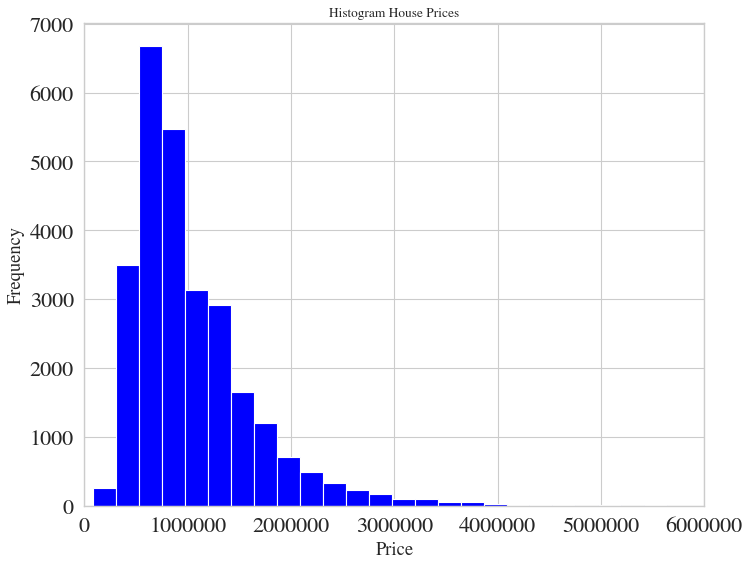

In [28]:

# Make a histogram of all the ratings in the Price column.
#print ("Skew is:", PriceArr.skew())
PriceArr = np.array(housing_data.na.drop(subset ='Price').select('Price').collect())
plt.hist(PriceArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('Price')
plt.xlim([0, 6000000])
plt.title ('Histogram House Prices')
plt.show()


In [41]:
# to view the selected column(s)
housing_data.select('Rooms','Bedroom2','YearBuilt','Car','Type','BuildingArea','Distance','Landsize','Bathroom','Price').limit(20).toPandas()

,Rooms,Bedroom2,YearBuilt,Car,Type,BuildingArea,Distance,Landsize,Bathroom,Price
0,2,2,None,1,h,None,2.5,126,1,None
1,2,2,None,1,h,None,2.5,202,1,1480000
2,2,2,1900,0,h,79,2.5,156,1,1035000
3,3,3,None,1,u,None,2.5,0,2,None
4,3,3,1900,0,h,150,2.5,134,2,1465000
5,3,3,None,1,h,None,2.5,94,2,850000
6,4,3,2014,2,h,142,2.5,120,1,1600000
7,4,3,2006,2,h,220,2.5,400,2,None
8,2,4,1900,2,h,None,2.5,201,1,None
9,2,3,1900,1,h,None,2.5,202,2,None


In [50]:
# to view statistical information of the selected column(s)
housing_data.describe('Rooms','YearBuilt','BuildingArea','Distance','Landsize','Price').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Rooms,34857,3.0310124221820582,0.9699329348975181,1,16
YearBuilt,15551,1965.289884894862,37.328178023136594,1196,2106
BuildingArea,13742,160.2564003565711,401.26706008485513,0.0,44515.0
Distance,34856,11.184929423916575,6.788892455935919,0.0,48.1
Landsize,23047,593.598993361392,3398.8419464599056,0,433014
Price,27247,1050173.344955408,641467.1301046003,85000,11200000


In [4]:
housing_data.head()

Row(Suburb='Abbotsford', Address='68 Studley St', Rooms='2', Type='h', Price=None, Method='SS', SellerG='Jellis', Date='3/09/2016', Distance='2.5', Postcode='3067', Bedroom2='2', Bathroom='1', Car='1', Landsize='126', BuildingArea=None, YearBuilt=None, CouncilArea='Yarra City Council', Lattitude='-37.8014', Longtitude='144.9958', Regionname='Northern Metropolitan', Propertycount='4019')

In [6]:
# A simple for loop allows us to make it even clearer. 
for item in housing_data.head():
    print(item)

Abbotsford
68 Studley St
2
h
None
SS
Jellis
3/09/2016
2.5
3067
2
1
1
126
None
None
Yarra City Council
-37.8014
144.9958
Northern Metropolitan
4019


In [5]:
# Select a list of relevant columns. 
# Name, for example, is somewhat irrelevant.
my_cols = housing_data.select([
 'Rooms',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount'])

In [6]:
# Dropping all the rows with null values
final_housing_data = my_cols.na.drop()

In [7]:
# number of rows/entry in the dataset
final_housing_data.count()

8887

In [7]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [20]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
type_indexer = StringIndexer(inputCol='Type',outputCol='TypeIndex').fit(final_housing_data)
final_housing_data= type_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='TypeIndex',outputCol='TypeVec').transform(final_housing_data)

In [22]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
region_indexer = StringIndexer(inputCol='Regionname',outputCol='RegionnameIndex').fit(final_housing_data)
final_housing_data= region_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='RegionnameIndex',outputCol='RegionnameVec').transform(final_housing_data)

In [23]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
method_indexer = StringIndexer(inputCol='Method',outputCol='MethodIndex').fit(final_housing_data)
final_housing_data= method_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='MethodIndex',outputCol='MethodVec').transform(final_housing_data)

In [24]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
council_indexer = StringIndexer(inputCol='CouncilArea',outputCol='CouncilAreaIndex').fit(final_housing_data)
final_housing_data= council_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='CouncilAreaIndex',outputCol='CouncilAreaVec').transform(final_housing_data)

In [44]:
#https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/1779476228152266/1437143569842658/5673666086694627/latest.html

#https://blog.epigno.systems/2018/02/18/machine-learning-with-pyspark-linear-regression/
#https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a



,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,Propertycount,TypeIndex,TypeVec,RegionnameIndex,RegionnameVec,MethodIndex,MethodVec,CouncilAreaIndex,CouncilAreaVec,features
0,2,h,1035000,S,2.5,2,1,0,156,79.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.5, 2.0, ..."
1,3,h,1465000,SP,2.5,3,2,0,134,150.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(3.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.5, 3.0, ..."
2,4,h,1600000,VB,2.5,3,1,2,120,142.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",3.0,"(0.0, 0.0, 0.0, 1.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.5, 3.0, ..."
3,3,h,1876000,S,2.5,4,2,0,245,210.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.5, 4.0, ..."
4,2,h,1636000,S,2.5,2,1,2,256,107.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.5, 2.0, ..."
5,2,h,1097000,S,2.5,3,1,2,220,75.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.5, 3.0, ..."
6,3,h,1350000,VB,2.5,3,2,2,214,190.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",3.0,"(0.0, 0.0, 0.0, 1.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.5, 3.0, ..."
7,2,u,750000,S,2.5,2,2,1,0,94.0,...,4019,1.0,"(0.0, 1.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.5, 2.0, ..."
8,2,h,1310000,S,2.5,2,1,2,238,97.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.5, 2.0, ..."
9,3,h,1200000,S,2.5,3,2,1,113,110.0,...,4019,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",12.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.5, 3.0, ..."


In [16]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=[
 'Rooms',
 'TypeVec',
 'MethodVec',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilAreaVec',
 'Lattitude',
 'Longtitude',
 'RegionnameVec',
 'Propertycount'],
    outputCol="features")

In [25]:
final_housing_data = assembler.transform(final_housing_data)

In [27]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_housing_data.randomSplit([0.7,0.3])

In [28]:
# importing LinearRegression
from pyspark.ml.regression import LinearRegression

In [29]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?
lr = LinearRegression(featuresCol='features', labelCol='Price', predictionCol='prediction')

In [30]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(train_data)

In [31]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [112859.6864201055,224195.86993791943,-211303.40988529383,45250.485773206936,24543.83322669823,-31454.722668874776,-10339.228666290219,-34357.84752696917,21395.600071310713,168876.61617110326,44715.70661687198,19.238465845982432,1351.155156371958,-2307.9635048256728,629657.2351948648,161218.37969812038,109557.4529434107,85239.16977016718,251061.01167432318,-115010.00199256527,295249.9310605373,-187115.05290704902,22389.20139172466,44097.133129858405,616366.1145927971,421012.5814285524,244582.38120885368,214734.5698075676,13353.596266572122,606271.6726464379,115727.30158865689,145718.8722060283,191763.9885795857,-361673.3843014664,150648.80090070132,-243925.37113642195,131812.37803891778,-32731.71750766983,329718.38882444537,74467.00755261959,120306.20564892566,-129249.0777418451,280147.18128423794,352011.9145266025,423469.1278377539,612808.508756299,-754836.0146581613,-57147.17148072056,-375106.3948263749,-484834.20161492174,-375633.1801602642,-270574.9269356231,-398223.5

In [33]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

In [47]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))


+-------------------+
|          residuals|
+-------------------+
| -131629.1833539512|
| -77423.25866024941|
| -513424.9893130101|
| -504096.7018292025|
|   862537.460796291|
|-103450.49942944013|
|  -74662.6614763774|
| 315233.68523950875|
|-10833.957357248291|
|-187863.12863452733|
| 201523.29341994226|
|  208897.2994007822|
| 192730.49262877367|
| 21487.486585391685|
|-102085.01135776378|
|  250635.1140926797|
| 168772.58576947823|
| -78366.49317493103|
|-348778.82689158805|
|  77486.82917949185|
+-------------------+
only showing top 20 rows

RSME: 402441.1636209203
R2: 0.6591677137006346


R2: 0.6591677137006346


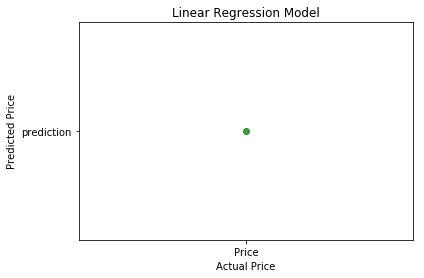

In [40]:
# view this relationship between predictions and actual_values graphically with a scatter plot.
plt.scatter(test_results.labelCol,test_results.predictionCol, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model')
plt.show()
print ("\n")